In [65]:
import torch
from torch import nn
from torch import optim
from torch.utils.data import Dataset
from torchvision import transforms

import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image
import pandas as pd
from PIL import Image, ImageDraw

torch.manual_seed(0)

In [10]:
train_labels = './Data/train_labels.csv'
train_images = './Data/train/'
test_images = './Data/test/'

In [8]:
labels_df = pd.read_csv(train_labels)
labels_df.head()


,id,label
0,f38a6374c348f90b587e046aac6079959adf3835,0
1,c18f2d887b7ae4f6742ee445113fa1aef383ed77,1
2,755db6279dae599ebb4d39a9123cce439965282d,0
3,bc3f0c64fb968ff4a8bd33af6971ecae77c75e08,0
4,068aba587a4950175d04c680d38943fd488d6a9d,0


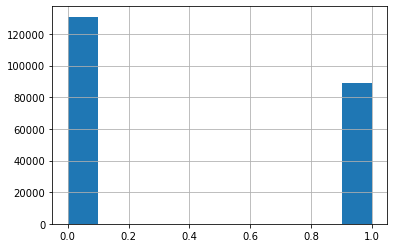

In [9]:
labels_df['label'].hist()

In [15]:
malignant_ids = labels_df.loc[labels_df['label']==1]['id'].values
print(f'Malignant: {malignant_ids}')

normal_ids = labels_df.loc[labels_df['label']==0]['id'].values
print(f'Normal: {normal_ids}')

Malignant: ['c18f2d887b7ae4f6742ee445113fa1aef383ed77'
 'a24ce148f6ffa7ef8eefb4efb12ebffe8dd700da'
 '7f6ccae485af121e0b6ee733022e226ee6b0c65f' ...
 '309210db7f424edbc22b2d13bf2fa27518b18f5c'
 'd4b854fe38b07fe2831ad73892b3cec877689576'
 'a81f84895ddcd522302ddf34be02eb1b3e5af1cb']
Normal: ['f38a6374c348f90b587e046aac6079959adf3835'
 '755db6279dae599ebb4d39a9123cce439965282d'
 'bc3f0c64fb968ff4a8bd33af6971ecae77c75e08' ...
 '53e9aa9d46e720bf3c6a7528d1fca3ba6e2e49f6'
 '3d046cead1a2a5cbe00b2b4847cfb7ba7cf5fe75'
 'f129691c13433f66e1e0671ff1fe80944816f5a2']


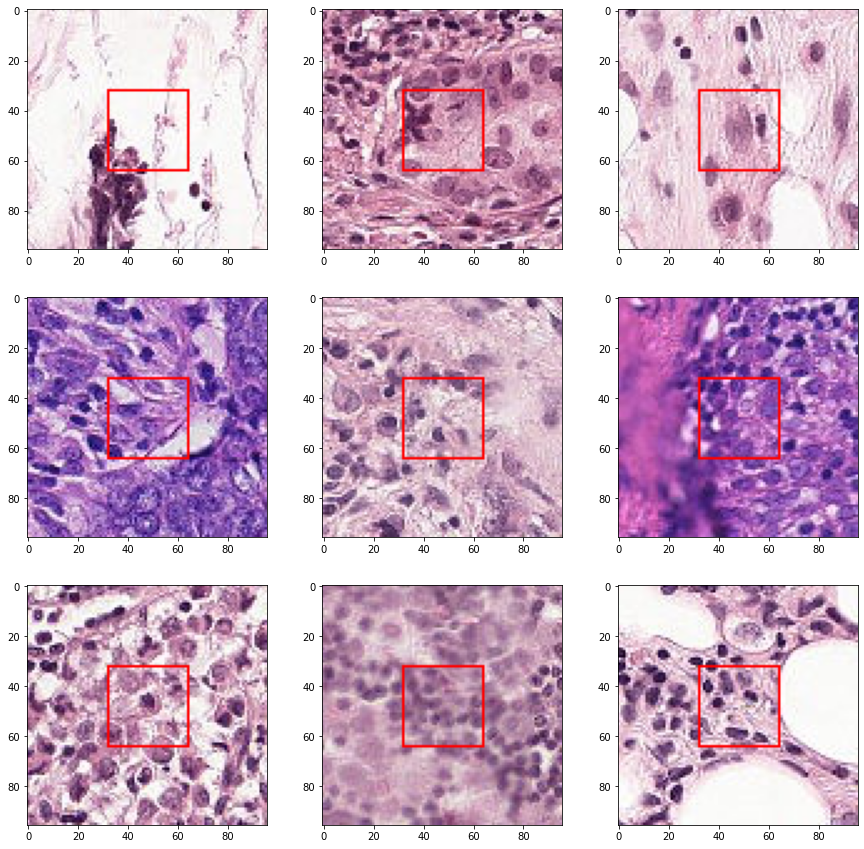

In [58]:
plt.rcParams['figure.figsize'] = (15., 15.)

for m_index, m_id in enumerate(malignant_ids[:9]):
    path = os.path.join(train_images, m_id + '.tif')
    img = Image.open(path)

    draw = ImageDraw.Draw(img)
    draw.rectangle(xy=((32, 32), (64, 64)), outline='red')

    plt.subplot(3, 3, m_index + 1)
    plt.imshow(np.array(img))

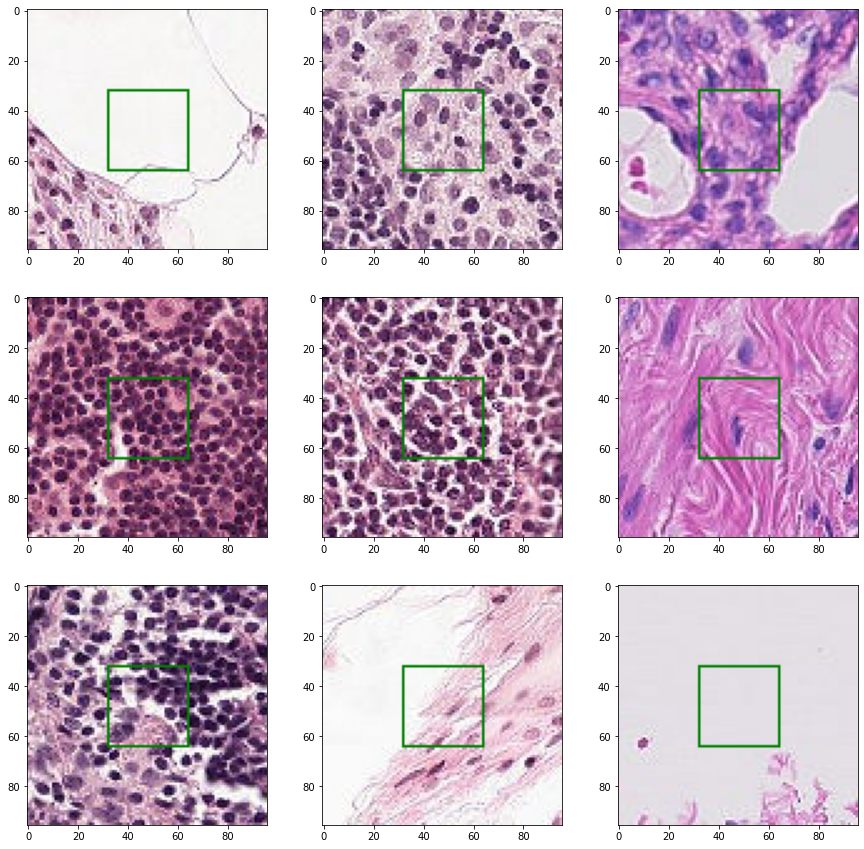

In [59]:
for n_index, n_id in enumerate(normal_ids[:9]):
    path = os.path.join(train_images, n_id + '.tif')
    img = Image.open(path)

    draw = ImageDraw.Draw(img)
    draw.rectangle(xy=((32, 32), (64, 64)), outline='green')

    plt.subplot(3, 3, n_index + 1)
    plt.imshow(np.array(img))

plt.show()

In [64]:
np.array(img).shape

(96, 96, 3)

In [ ]:
class CancerDataset(Dataset):
    def __init__(self, transform, path, type='train'):
        path = os.path.join(path, type)
        filenames = os.listdir(path)
        self.full_filenames = [os.path.join(path, file) for file in filenames]

        labels_filename = 

